#### Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, MACCSkeys
from sklearn.feature_selection import VarianceThreshold

## Load Data(correct?)

In [34]:
df = pd.read_csv('tested_molecules.csv')
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    descriptors = [Descriptors.descList[i][1](mol) for i in range(len(Descriptors.descList))]
    return descriptors

# Compute descriptor values for each SMILES string and add as new columns
descriptor_columns = [descriptor[0] for descriptor in Descriptors.descList]
df[descriptor_columns] = df['SMILES'].apply(lambda x: pd.Series(compute_descriptors(x)))
df.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,0,0,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df = pd.read_csv('tested_molecules.csv')
df.head()


def smiles_to_maccs(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return MACCSkeys.GenMACCSKeys(mol)
    else:
        return None
    
# Convert the MACCS keys to a more readable format (optional)
def maccs_to_bitstring(maccs):
    return [int(bit) for bit in maccs.ToBitString()]

initial_df['maccs_keys'] = initial_df['SMILES'].apply(smiles_to_maccs)
initial_df['maccs_keys_bitstring'] = initial_df['maccs_keys'].apply(maccs_to_bitstring)

initial_df.to_csv('Train set with MACCS keys.csv', index=False)
initial_df.head()

,SMILES,PKM2_inhibition,ERK2_inhibition
0,C=C(C)c1nc(N)nc(N)n1,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0


In [23]:
# Load binary MACCS keys
initial_df = pd.read_csv('tested_molecules.csv')
initial_df.head()

def smiles_to_maccs(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return MACCSkeys.GenMACCSKeys(mol)
    else:
        return None

initial_df['maccs_keys'] = initial_df['SMILES'].apply(smiles_to_maccs)

# Convert the MACCS keys to a more readable format (optional)
def maccs_to_bitstring(maccs):
    return [int(bit) for bit in maccs.ToBitString()]

initial_df['maccs_keys_bitstring'] = initial_df['maccs_keys'].apply(maccs_to_bitstring)

initial_df.to_csv('Train set with MACCS keys.csv', index=False)
initial_df.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,maccs_keys,maccs_keys_bitstring
0,C=C(C)c1nc(N)nc(N)n1,0,0,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,...,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,...,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,...,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,...,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,...,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [21]:
# Do the same for the test set
initial_df = pd.read_csv('untested_molecules-3.csv')
initial_df.head()

initial_df['maccs_keys'] = initial_df['SMILES'].apply(smiles_to_maccs)
initial_df['maccs_keys_bitstring'] = initial_df['maccs_keys'].apply(maccs_to_bitstring)

initial_df.to_csv('Test set with MACCS keys.csv', index=False)

#### Path

In [4]:
data_path = r'tested_molecular_desc.csv'

#### Load data(Possibly incorrect)

In [65]:
#df = pd.read_csv(data_path)

# Check if there is any missing data and duplicated rows
missing_count = df.isnull().sum().sum()
print("Number of missing values in each column:\n", missing_count)
any_missing_values = df.isna().values.any()
print("Are there any missing values in the DataFrame?",any_missing_values)

# Check for infinite values
inf_values = df.isin([np.inf, -np.inf]).sum().sum()
print("Number of infinite values in each column:")
print(inf_values)

# Count the number of duplicated rows
duplicate_count = df.duplicated().sum()
print("Number of duplicated rows:", duplicate_count)

# Check which rows only contain one value
single_value_columns = df.columns[df.nunique() == 1]
print("Column containing only one value:", single_value_columns)
# Remove the columns with only one unique value from the DataFrame
df = df.drop(columns=single_value_columns)

# Create dataframes for SMILES, PKM2 and ERK2
smiles = df['SMILES']
PKM2_inhibition = df['PKM2_inhibition']
ERK2_inhibition = df['ERK2_inhibition']
data = df.iloc[:, 4::]

# Create the labels DataFrame
labels = pd.DataFrame(index=df.index, columns=['labels'])
# Assign labels based on conditions
labels['Class'] = df['PKM2_inhibition'] + 2 * df['ERK2_inhibition']
# Class labels
class_labels = {
    0: 'None',
    1: 'PKM2',
    2: 'ERK2',
    3: 'PKM2 and ERK2',
}

# Assuming 'data' is your DataFrame
data = data.dropna(axis=1)
data.head()

Number of missing values in each column:
 0
Are there any missing values in the DataFrame? False
Number of infinite values in each column:
0
Number of duplicated rows: 0
Column containing only one value: Index([], dtype='object')


,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,0.120833,5.313889,0.120833,0.592228,151.173,142.101,151.085795,58.0,0.224863,-0.367629,...,5.0,2.0,5.0,1.0,0.0,0.0,0.0,1.0,0.06910,43.3598
1,-0.366756,11.238954,0.225308,0.785414,250.681,239.593,250.039672,88.0,0.335962,-0.487877,...,3.0,0.0,4.0,3.0,0.0,0.0,0.0,2.0,3.23272,67.7090
2,-0.049610,11.090706,0.049610,0.581062,210.277,192.133,210.136828,84.0,0.219755,-0.352647,...,2.0,2.0,4.0,8.0,0.0,0.0,0.0,0.0,0.76110,60.2644
3,-0.457824,11.892238,0.076632,0.441090,232.239,220.143,232.084792,88.0,0.351624,-0.617888,...,4.0,0.0,5.0,3.0,0.0,0.0,0.0,2.0,0.55792,63.5490
4,-0.498260,11.693580,0.012315,0.720343,226.663,215.575,226.050905,80.0,0.331143,-0.295099,...,4.0,0.0,5.0,4.0,0.0,0.0,0.0,1.0,1.03540,60.3660


### Distribution of data

#### Correlation data

Total correlated variable pairs (correlation > 0.95): 65


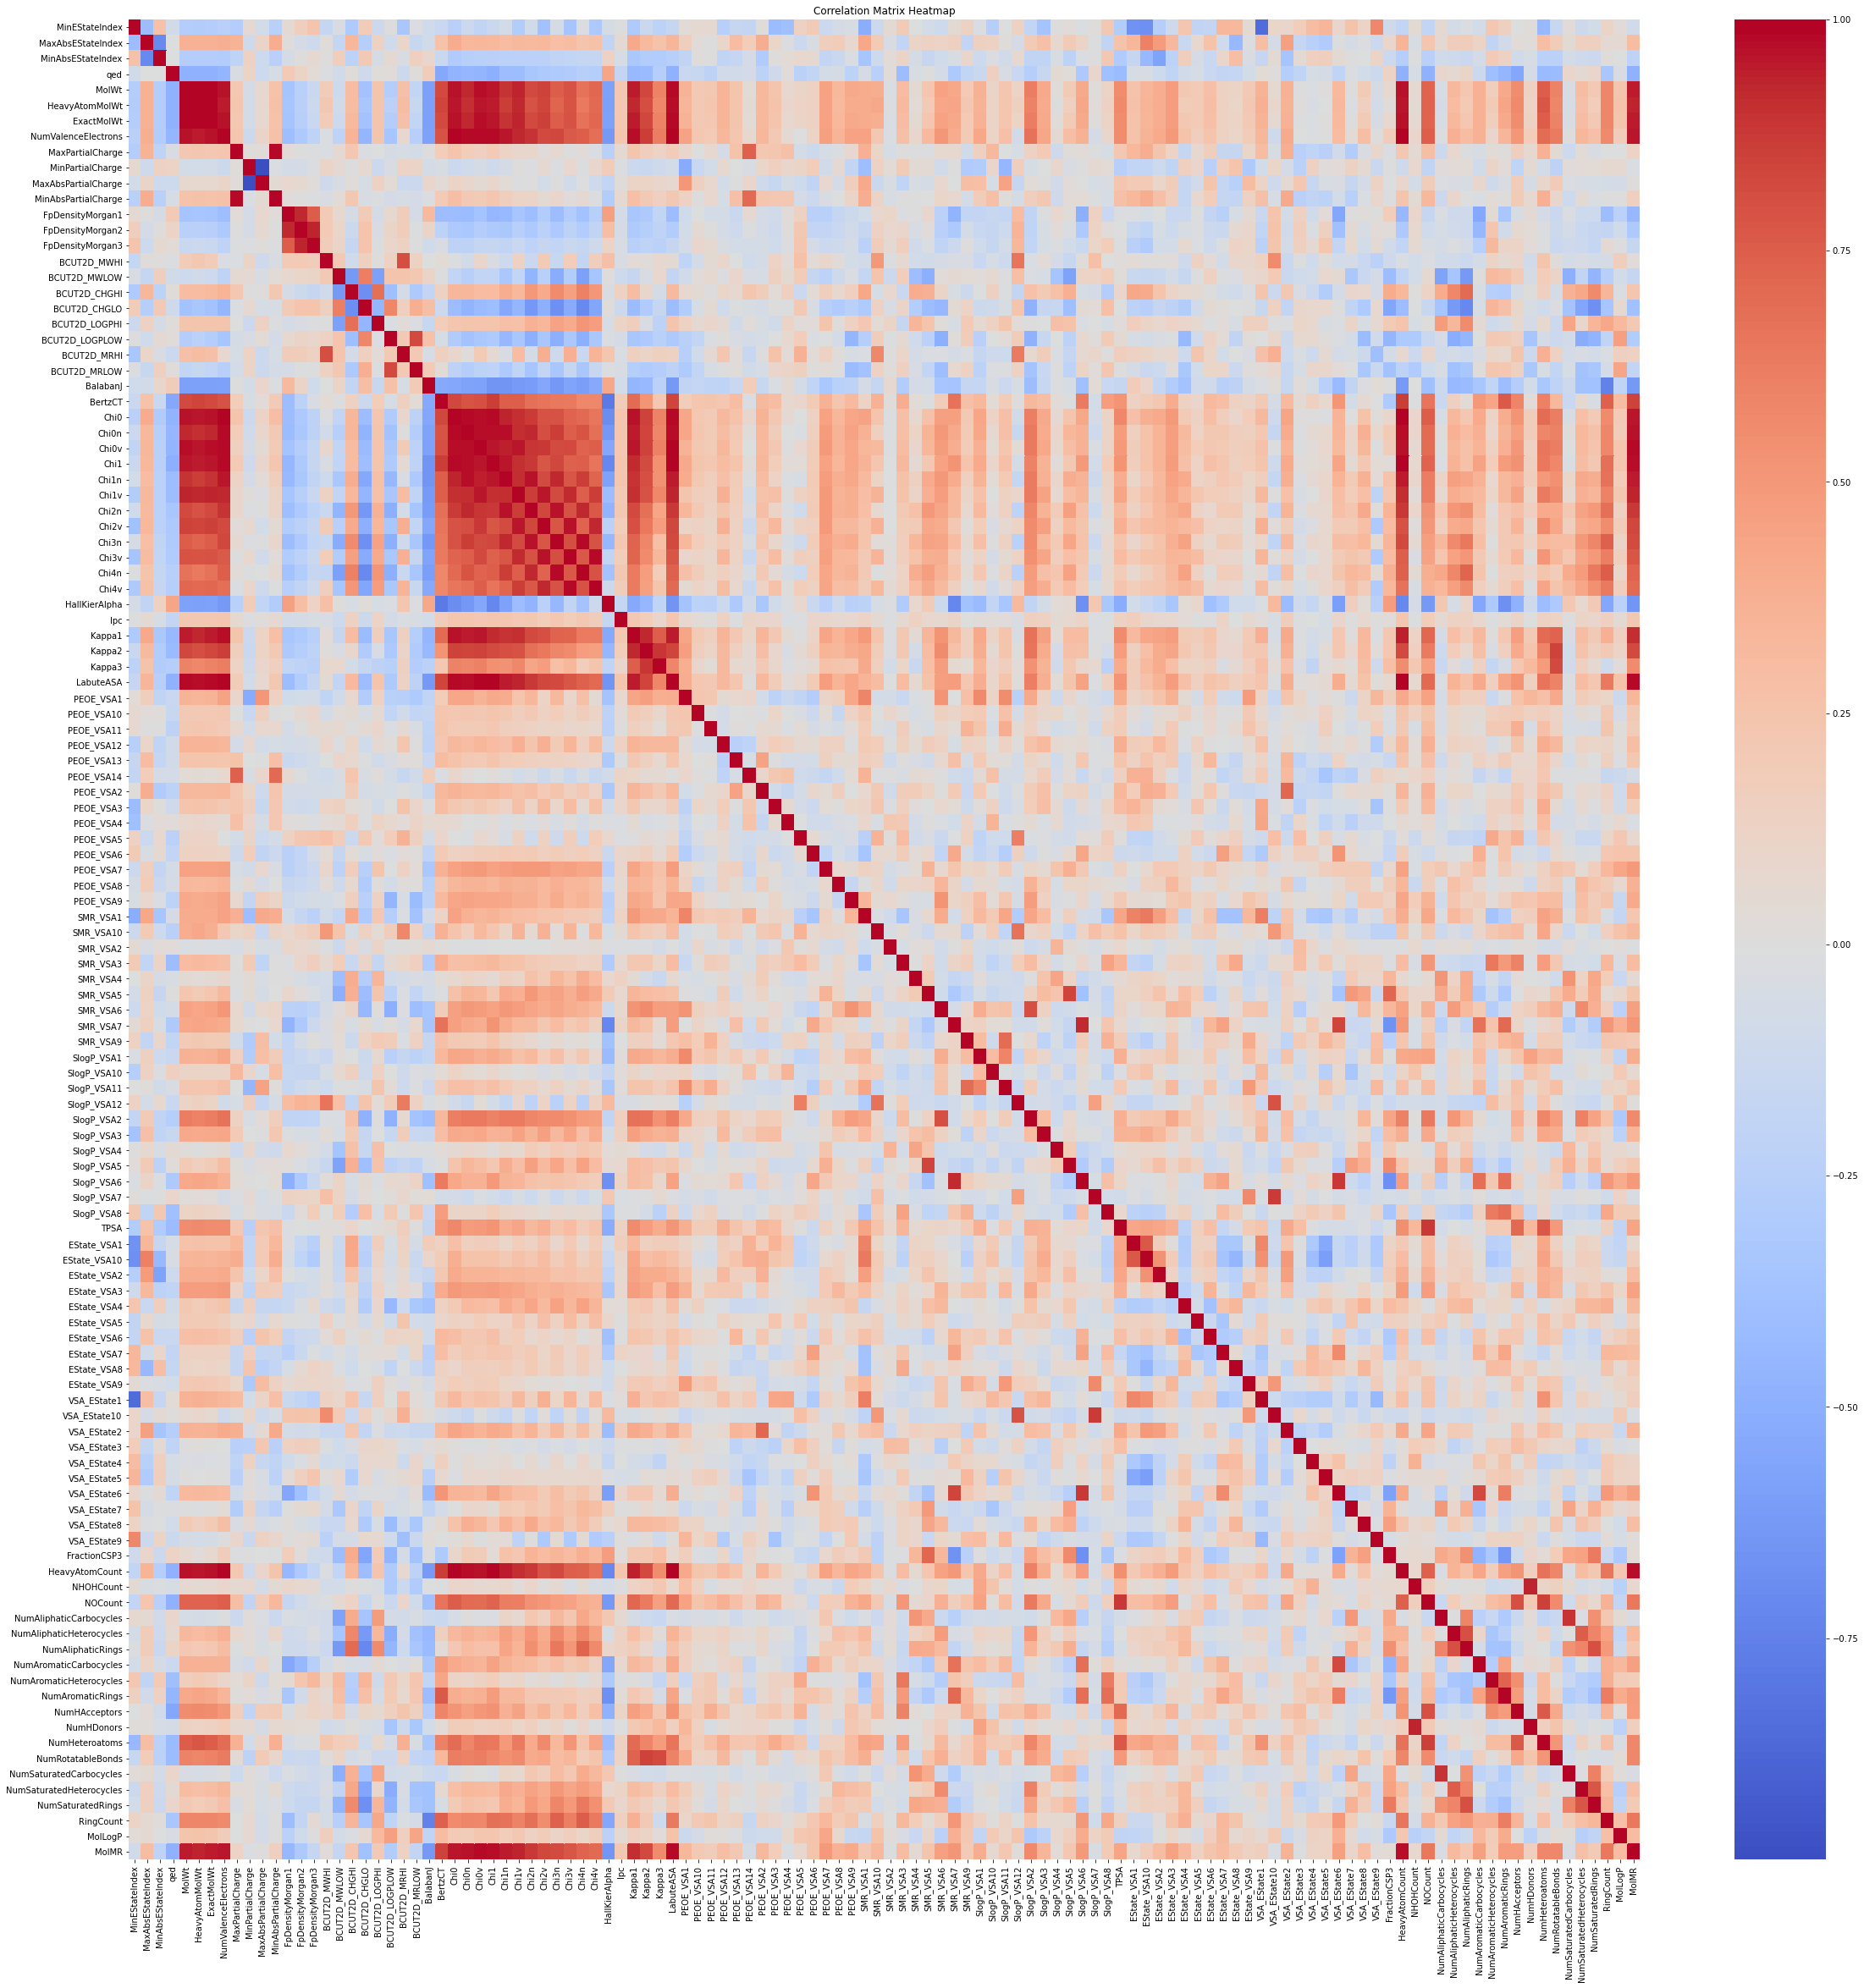

In [66]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Threshold correlation
correlation_value = 0.95
# Create a mask for correlations greater than the threhold
highly_correlated_mask = np.abs(correlation_matrix) > correlation_value
# Set the diagonal values to FALSE
np.fill_diagonal(highly_correlated_mask.values, False)
# Extract the upper triangle of the correlation matrix
upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
# Apply the upper triangle mask to the highly correlated mask
highly_correlated_upper = highly_correlated_mask & upper_triangle_mask
# Count the number of highly correlated pairs
highly_correlated_count = highly_correlated_upper.sum()

print(f"Total correlated variable pairs (correlation > {correlation_value}):", highly_correlated_count.sum())

# Generate a heatmap
plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

 ### Remove highly correlated values( > 0.9) and show new heatmap

In [53]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Compute the correlation matrix
correlation_matrix = data.corr()

# Find highly correlated pairs
highly_correlated_pairs = {}
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[correlation_matrix[col].abs() > 0.9].tolist()
    correlated_cols.remove(col)  # Remove the column itself from the list
    if correlated_cols:
        highly_correlated_pairs[col] = correlated_cols

# Drop the variable with the highest average correlation
for col, correlated_cols in highly_correlated_pairs.items():
    avg_correlation = {}
    for correlated_col in correlated_cols:
        if correlated_col in data.columns:  # Check if the column exists in the DataFrame
            avg_correlation[correlated_col] = correlation_matrix[correlated_col].abs().mean()
    if avg_correlation:
        col_to_drop = max(avg_correlation, key=avg_correlation.get)
        data.drop(col_to_drop, axis=1, inplace=True)

# Display the resulting DataFrame
data.head()

,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,...,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP
0,0.120833,5.313889,0.120833,0.592228,2.000000,15.136768,10.324116,1.999502,-1.985357,2.061950,...,1.0,1.0,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.06910
1,-0.366756,11.238954,0.225308,0.785414,2.941176,35.495704,10.129819,2.036408,-2.058730,2.220550,...,1.0,2.0,3.0,4.0,3.0,0.0,0.0,0.0,2.0,3.23272
2,-0.049610,11.090706,0.049610,0.581062,1.666667,16.151392,10.194131,2.025367,-2.024953,1.944846,...,0.0,0.0,2.0,4.0,8.0,0.0,0.0,0.0,0.0,0.76110
3,-0.457824,11.892238,0.076632,0.441090,2.941176,16.658607,10.266933,2.165357,-2.109327,2.062716,...,1.0,2.0,4.0,5.0,3.0,0.0,0.0,0.0,2.0,0.55792
4,-0.498260,11.693580,0.012315,0.720343,2.400000,35.495691,10.486281,2.068968,-2.066519,1.970346,...,1.0,1.0,4.0,5.0,4.0,0.0,0.0,0.0,1.0,1.03540


Total correlated variable pairs (correlation > 0.9): 0


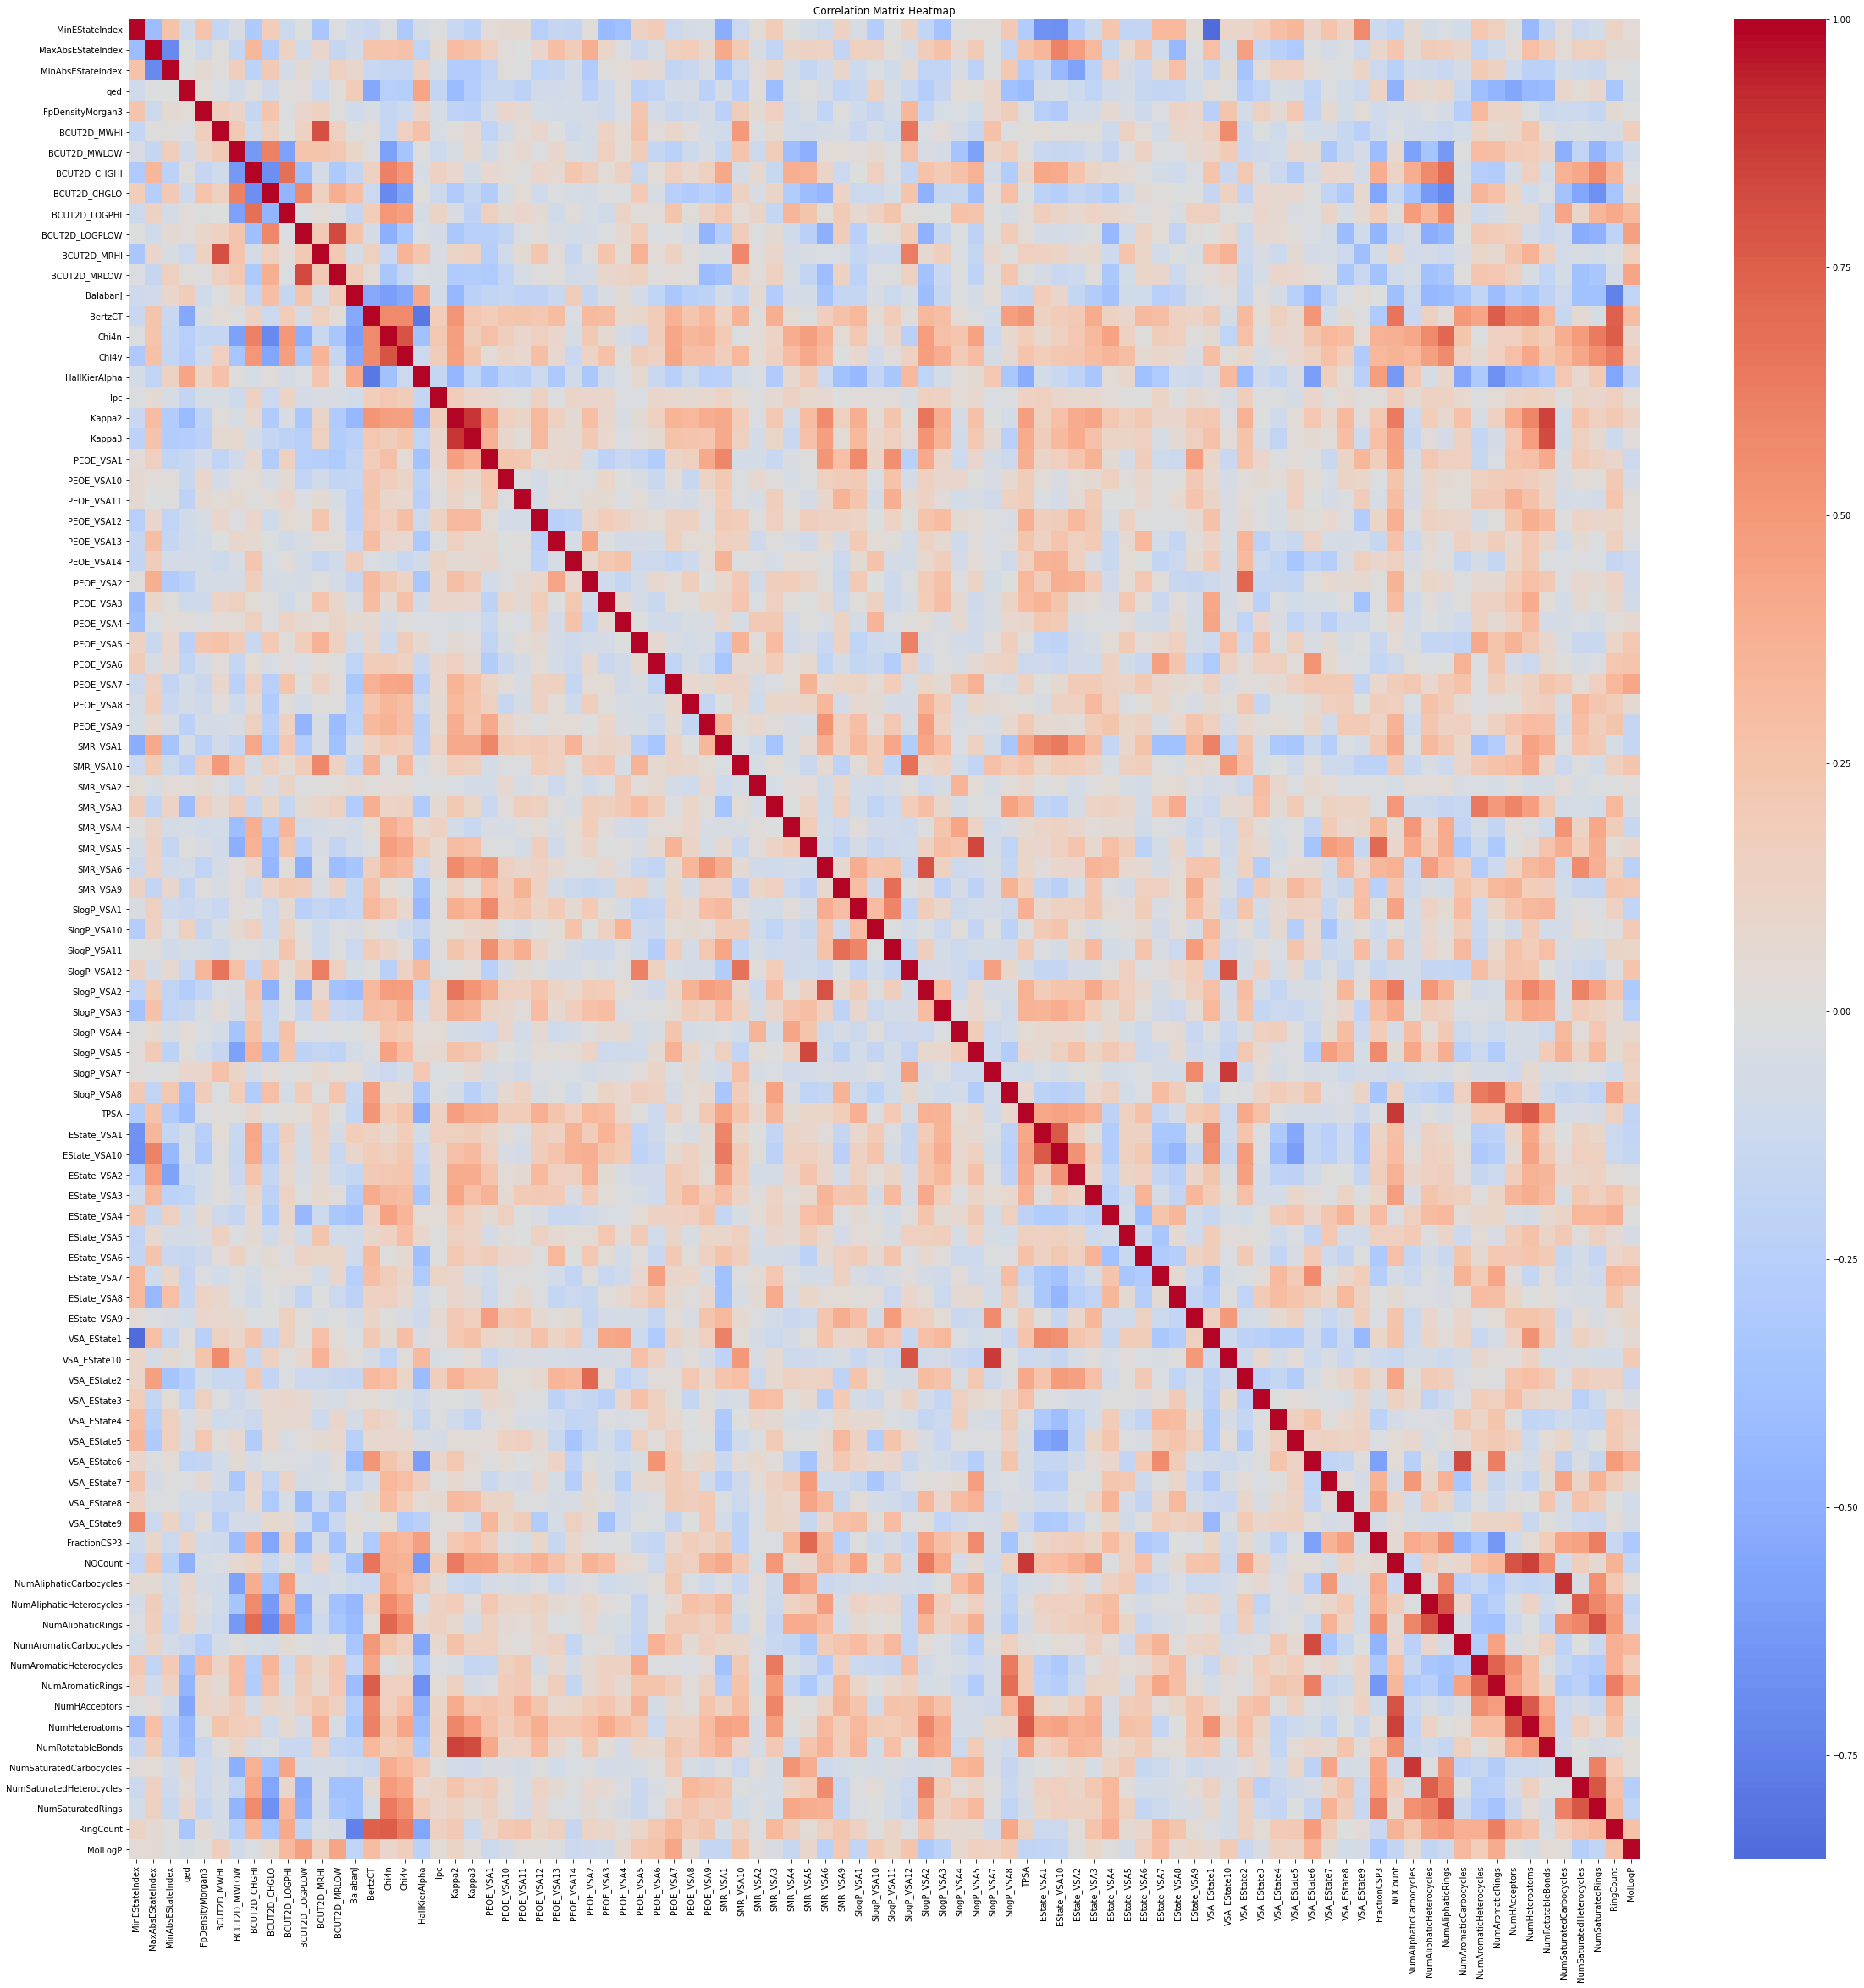

,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,...,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP
0,0.120833,5.313889,0.120833,0.592228,2.000000,15.136768,10.324116,1.999502,-1.985357,2.061950,...,1.0,1.0,5.0,5.0,1.0,0.0,0.0,0.0,1.0,0.06910
1,-0.366756,11.238954,0.225308,0.785414,2.941176,35.495704,10.129819,2.036408,-2.058730,2.220550,...,1.0,2.0,3.0,4.0,3.0,0.0,0.0,0.0,2.0,3.23272
2,-0.049610,11.090706,0.049610,0.581062,1.666667,16.151392,10.194131,2.025367,-2.024953,1.944846,...,0.0,0.0,2.0,4.0,8.0,0.0,0.0,0.0,0.0,0.76110
3,-0.457824,11.892238,0.076632,0.441090,2.941176,16.658607,10.266933,2.165357,-2.109327,2.062716,...,1.0,2.0,4.0,5.0,3.0,0.0,0.0,0.0,2.0,0.55792
4,-0.498260,11.693580,0.012315,0.720343,2.400000,35.495691,10.486281,2.068968,-2.066519,1.970346,...,1.0,1.0,4.0,5.0,4.0,0.0,0.0,0.0,1.0,1.03540


In [54]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Threshold correlation
correlation_value = 0.9
# Create a mask for correlations greater than the threhold
highly_correlated_mask = np.abs(correlation_matrix) > correlation_value
# Set the diagonal values to FALSE
np.fill_diagonal(highly_correlated_mask.values, False)
# Extract the upper triangle of the correlation matrix
upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
# Apply the upper triangle mask to the highly correlated mask
highly_correlated_upper = highly_correlated_mask & upper_triangle_mask
# Count the number of highly correlated pairs
highly_correlated_count = highly_correlated_upper.sum()

print(f"Total correlated variable pairs (correlation > {correlation_value}):", highly_correlated_count.sum())

# Generate a heatmap
plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()
data.head()

## Remove variables with low variance

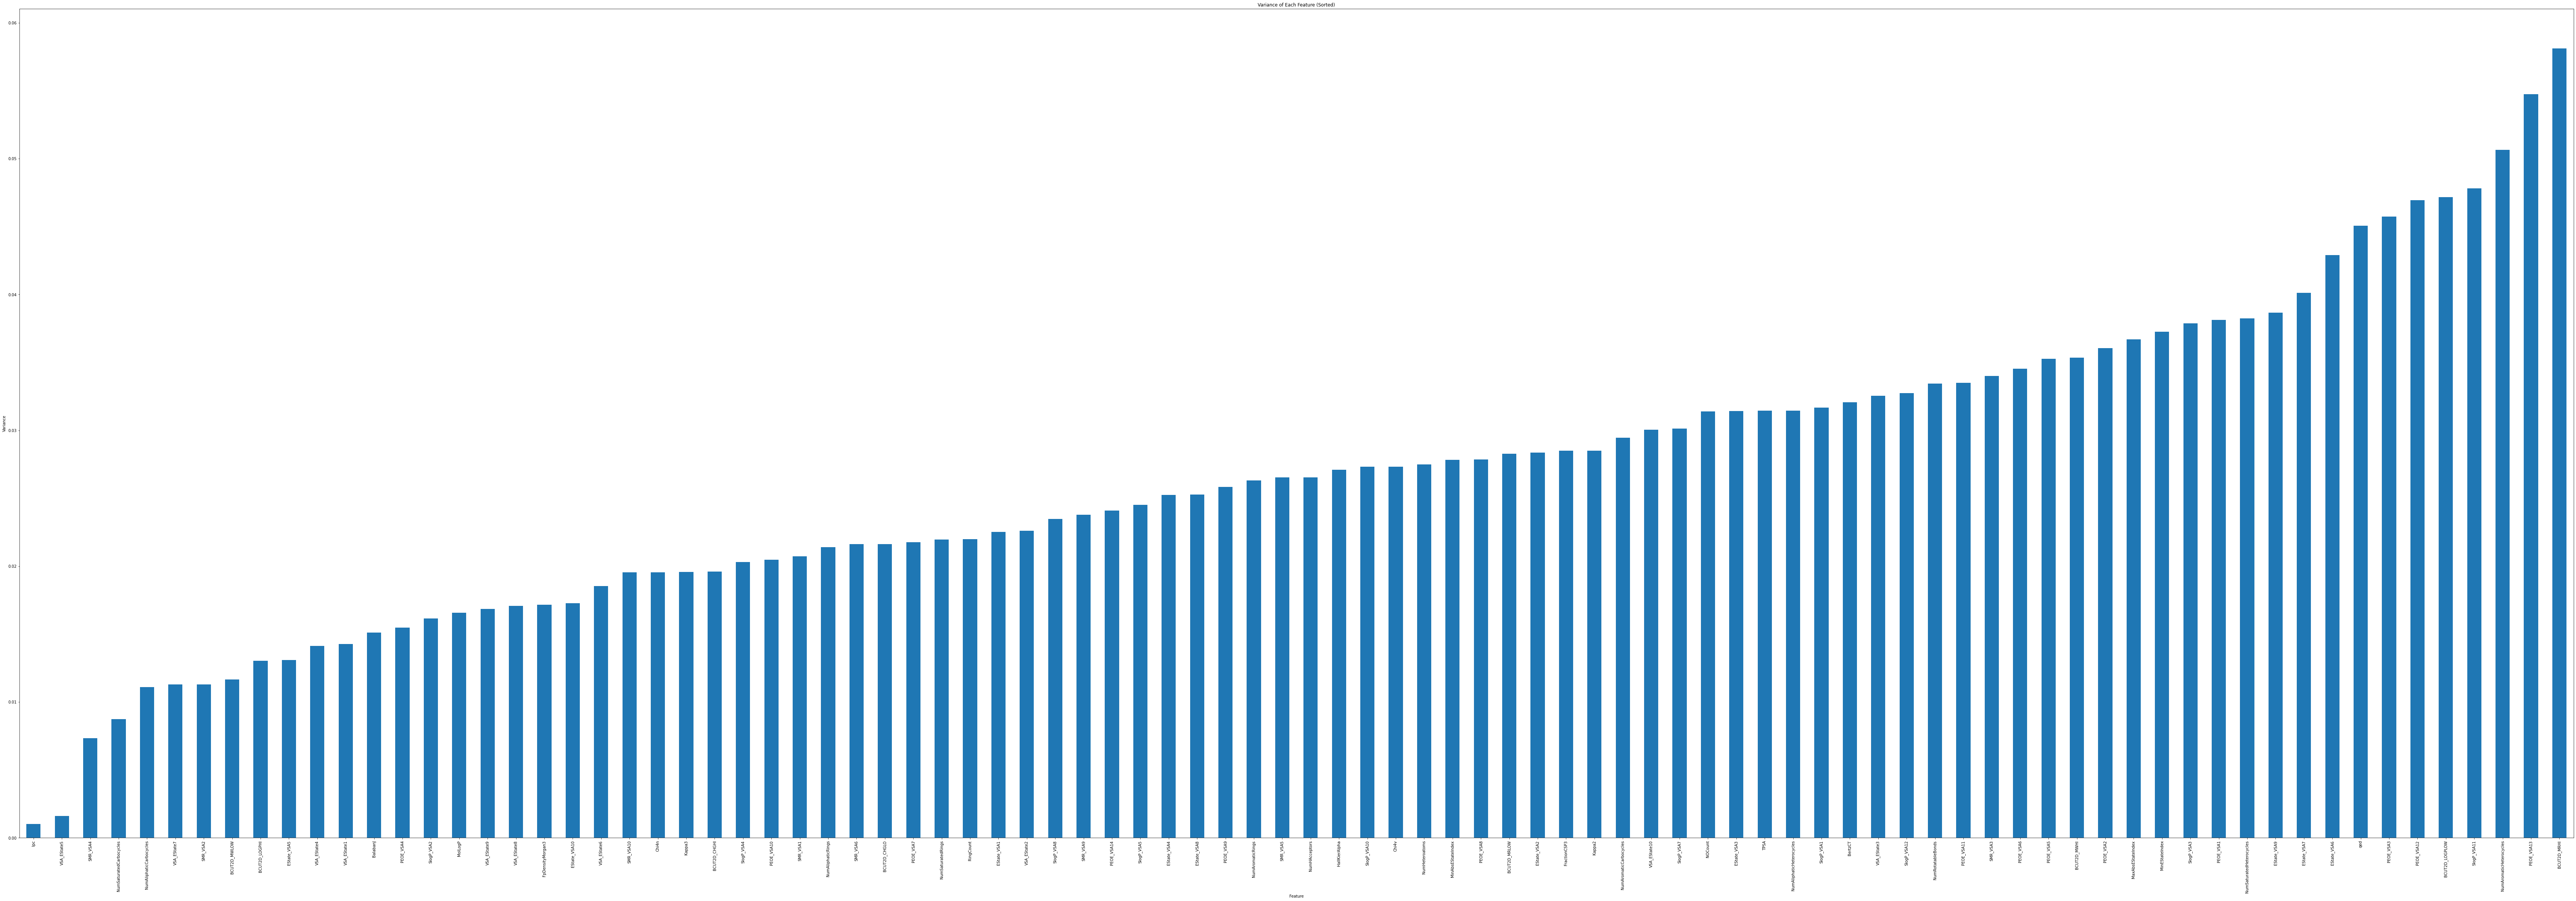

Ipc                        0.001017
VSA_EState5                0.001610
SMR_VSA4                   0.007347
NumSaturatedCarbocycles    0.008750
NumAliphaticCarbocycles    0.011104
dtype: float64

In [55]:
# Scales data between 0 and 1
minmax_scaler = MinMaxScaler()

minmax_data = minmax_scaler.fit_transform(data)
scaled_df = pd.DataFrame(minmax_data, columns=data.columns)
scaled_df.head()

# Calculate variance of each feature
variances = scaled_df.var()

# Sort variances
variances_sorted = variances.sort_values()

# Plot sorted variances
plt.figure(figsize=(120, 40))
variances_sorted.plot(kind='bar')
#plt.ylim(0,5)
plt.ylabel('Variance')
plt.xlabel('Feature')
plt.title('Variance of Each Feature (Sorted)')
plt.show()

variances_sorted.head()

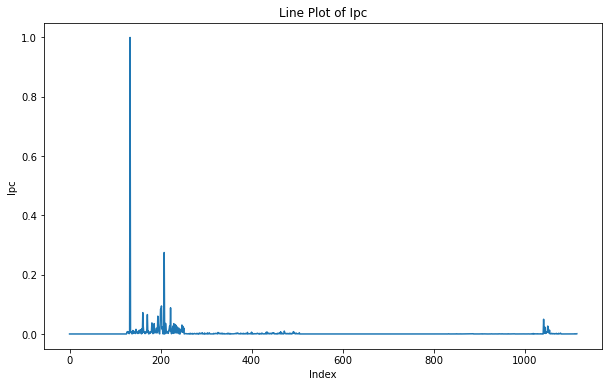

In [44]:
# Plot a single variable (column)
variable = 'Ipc'
plt.figure(figsize=(10, 6))
plt.plot(scaled_df[variable])
plt.title(f'Line Plot of {variable}')
plt.xlabel('Index')
plt.ylabel(variable)
plt.show()

In [57]:
# Set the variance threshold
threshold = 0.01

# Apply VarianceThreshold
selector = VarianceThreshold(threshold)
data_high_variance = selector.fit_transform(scaled_df)

# Get the mask of retained features
retained_features_mask = selector.get_support()

# Filter the original dataframe to retain only high variance columns
high_variance_columns = scaled_df.columns[retained_features_mask]
minmax_data = scaled_df[high_variance_columns]


#### Visualization distribution features

In [9]:
df_melted = data.melt(var_name='Feature', value_name='Value')

# Create the boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Feature', y='Value', data=df_melted)
# plt.title('Boxplot of Features')
# plt.xlabel('Feature')
# plt.ylabel('Value')
# plt.show()

# Create histograms
# g = sns.FacetGrid(df_melted, col='Feature', col_wrap=5, sharex=False, sharey=False)
# g.map(plt.hist, 'Value', bins=20)
# g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle('Histograms of Features')
# plt.show()

# Create density plots
# g = sns.FacetGrid(df_melted, col='Feature', col_wrap=5, sharex=False, sharey=False)
# g.map(sns.kdeplot, 'Value')
# g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle('Density Plots of Features')
# plt.show()

### Principal Component Analysis

In [67]:
# Scales data between 0 and 1
minmax_scaler = MinMaxScaler()

minmax_data = minmax_scaler.fit_transform(data)

# Initialize the 2D PCA
#pca = PCA(n_components=2)
pca = PCA()

# Applies SVD to find the features with the most variance
data_pca = pca.fit_transform(minmax_data)

#### All molecules

##### Scree plot

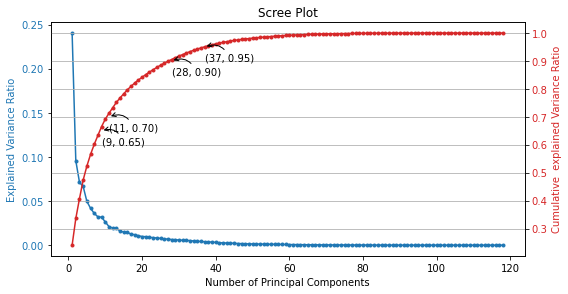

In [68]:
n_features = data.shape[1]
pca_features = PCA(n_components=n_features)
pca_features.fit(minmax_data)

# Calculate explained variance ratio
explained_variance_ratio = pca_features.explained_variance_ratio_

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the EVR of each component (feature)
color = 'tab:blue'
ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Explained Variance Ratio', color=color)
ax1.plot(np.arange(1, n_features+1), explained_variance_ratio, marker='.', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot the cumulative EVR of each component
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative  explained Variance Ratio', color=color)
ax2.plot(np.arange(1, n_features+1), np.cumsum(explained_variance_ratio), marker='.', linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add annotations for specific points
thresholds = [0.65, 0.70, 0.90, 0.95]
for threshold in thresholds:
    index = np.argmax(np.cumsum(explained_variance_ratio) >= threshold)
    plt.annotate(f'({index+1}, {threshold:.2f})',
                 xy=(index+1, threshold),
                 xytext=(index+1, threshold - 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.5'))

fig.tight_layout()
plt.title('Scree Plot')
plt.grid(True)
plt.show()

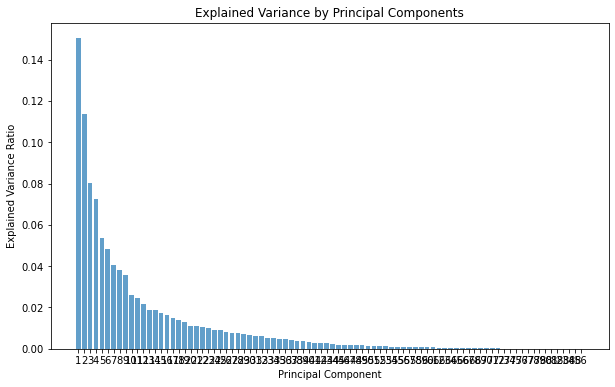

In [61]:
# Create bar plot of the PC explained variance

# Explained variance
explained_variance = pca_features.explained_variance_ratio_

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

##### Visualization PCA 2D

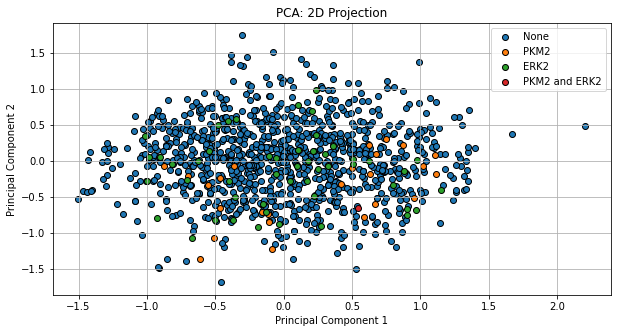

In [13]:
# Plot the PC1 and PC2 with different colors matching the classes
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.scatter(data_pca[labels['Class'] == i, 0], data_pca[labels['Class'] == i, 1], label=class_labels[i], edgecolor='k')
plt.title('PCA: 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

#### Molecules that only contain PKM2 and/or ERK2

In [14]:
# Remove all molecules that do not contain PKM2 and/or ERK2
data_filtered = data[labels['Class'] != 0]
labels_filtered = labels[labels['Class'] != 0]
# Scale data and apply pca
minmax_data_filtered = minmax_scaler.fit_transform(data_filtered)
data_pca_filtered = pca.fit_transform(minmax_data_filtered)

##### Scree plot

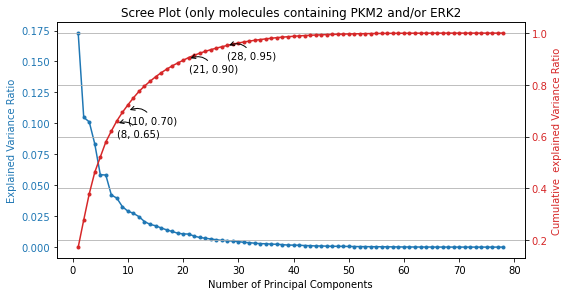

In [31]:
n_features = min(data_filtered.shape[0], data_filtered.shape[1])
pca_features_filtered = PCA(n_components=n_features)
pca_features_filtered.fit(minmax_data_filtered)

# Calculate explained variance ratio
explained_variance_ratio_filtered = pca_features_filtered.explained_variance_ratio_

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the EVR of each component (feature)
color = 'tab:blue'
ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Explained Variance Ratio', color=color)
ax1.plot(np.arange(1, n_features+1), explained_variance_ratio_filtered, marker='.', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot the cumulative EVR of each component
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative  explained Variance Ratio', color=color)
ax2.plot(np.arange(1, n_features+1), np.cumsum(explained_variance_ratio_filtered), marker='.', linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add annotations for specific points
thresholds = [0.65, 0.70, 0.90, 0.95]
for threshold in thresholds:
    index = np.argmax(np.cumsum(explained_variance_ratio_filtered) >= threshold)
    plt.annotate(f'({index+1}, {threshold:.2f})',
                 xy=(index+1, threshold),
                 xytext=(index+1, threshold - 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.5'))

fig.tight_layout()
plt.title('Scree Plot (only molecules containing PKM2 and/or ERK2')
plt.grid(True)
plt.show()


##### Visualization PCA 2D

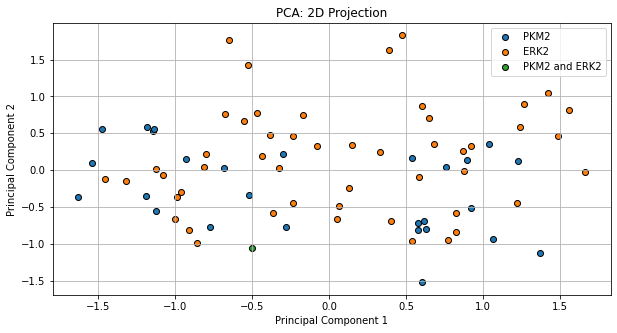

In [16]:
# Plot the PC1 and PC2 with different colors matching the classes
plt.figure(figsize=(10, 5))
for i in range(1,4):
    plt.scatter(data_pca_filtered[labels_filtered['Class'] == i, 0], data_pca_filtered[labels_filtered['Class'] == i, 1], label=class_labels[i], edgecolor='k')
plt.title('PCA: 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

#### Loadings

In [17]:
pca = PCA()
pca.fit(minmax_data)

# Get loadings (eigenvectors)
loadings = pca.components_

# Create a DataFrame for loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=data.columns)
loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90
MinEStateIndex,-0.113988,-0.057836,0.287671,0.006540,0.097800,-0.087094,-0.258389,-0.009198,0.046201,-0.038244,...,0.028374,0.023889,0.005130,0.007879,-0.000669,-4.668442e-16,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
MaxAbsEStateIndex,0.155041,0.062409,-0.149635,-0.034952,-0.170332,0.096610,-0.176275,0.041175,0.034573,0.076466,...,0.001210,0.004313,-0.001729,0.001582,0.003532,-1.426000e-16,-2.154385e-17,-1.151103e-17,4.878119e-18,2.228720e-17
MinAbsEStateIndex,-0.113690,-0.049307,0.101990,0.033500,0.079956,-0.021283,0.170885,-0.109797,0.028750,-0.041528,...,0.002754,-0.003139,0.000595,-0.002773,-0.000120,-1.362416e-16,2.303266e-17,-1.063857e-16,-1.647111e-16,5.570970e-17
qed,-0.141659,0.204291,-0.087933,-0.065778,0.027582,0.124714,0.053795,0.037964,0.048324,-0.137613,...,0.005645,0.009834,0.002959,-0.005749,-0.001127,3.297984e-16,1.575569e-16,-4.488929e-17,1.842585e-16,3.006868e-17
FpDensityMorgan3,-0.044203,-0.055360,0.007408,0.059372,0.077210,-0.048394,-0.047571,-0.014721,0.110180,0.009491,...,-0.006849,-0.020015,0.020265,0.011624,-0.005119,-5.480936e-17,1.922287e-17,-2.891792e-17,-8.924149e-17,2.238856e-16


## Two types of loading plots

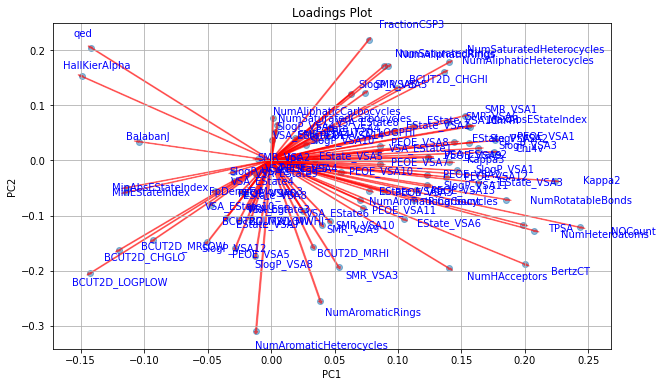

In [18]:
# Plot loadings
plt.figure(figsize=(10, 6))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'], alpha=0.5)
for feature in loadings_df.index:
    plt.arrow(0, 0, loadings_df.loc[feature, 'PC1'], loadings_df.loc[feature, 'PC2'], color='r', alpha=0.5)
    plt.text(loadings_df.loc[feature, 'PC1']*1.1, loadings_df.loc[feature, 'PC2']*1.1, feature, color='b')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Loadings Plot')
plt.grid(True)
plt.show()

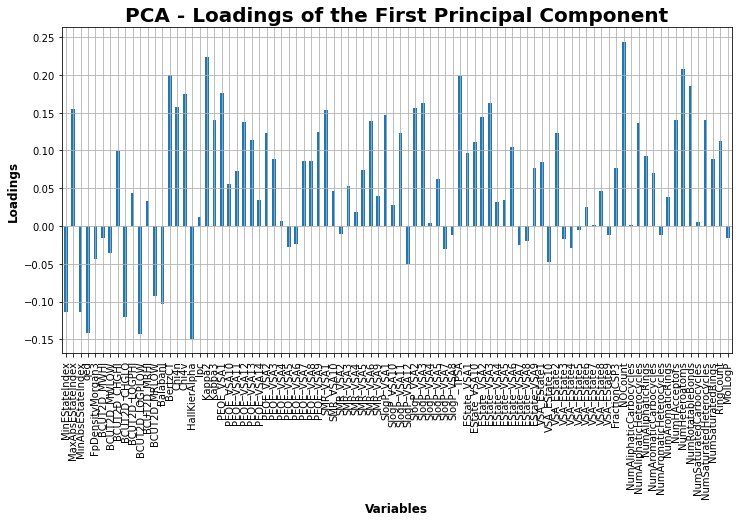

In [19]:
# Plot the loadings of the first principal component
fig, ax = plt.subplots(figsize=(12, 6))
loadings_df['PC1'].plot(kind='bar', ax=ax, legend=False)
ax.set_xlabel('Variables', fontdict = {'fontweight' : 'bold', 'fontsize' : 12})
ax.set_ylabel('Loadings', fontdict = {'fontweight' : 'bold', 'fontsize' : 12})
ax.set_title('PCA - Loadings of the First Principal Component', fontdict = {'fontweight' : 'bold', 'fontsize' : 20})
ax.grid(True)

### TSNE (maybe)